<a href="https://colab.research.google.com/github/zackhalepoto/Data_Science_Projects/blob/main/Credit_Risk_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.model_selection import cross_validate

In [ ]:
df= pd.read_csv('credit_risk_dataset.csv')

In [ ]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [ ]:
df.info

<bound method DataFrame.info of        person_age  person_income person_home_ownership  person_emp_length  \
0              22          59000                  RENT              123.0   
1              21           9600                   OWN                5.0   
2              25           9600              MORTGAGE                1.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
...           ...            ...                   ...                ...   
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_amn

In [ ]:
df.describe

<bound method NDFrame.describe of        person_age  person_income person_home_ownership  person_emp_length  \
0              22          59000                  RENT              123.0   
1              21           9600                   OWN                5.0   
2              25           9600              MORTGAGE                1.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
...           ...            ...                   ...                ...   
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_a

**Exploratory Data Analysis**

In [ ]:
#Null values
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
df['person_emp_length'].fillna(df['person_emp_length'].mean(),inplace=True)
df['loan_int_rate'].fillna(df['loan_int_rate'].mean(),inplace=True)

In [ ]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

Outliers

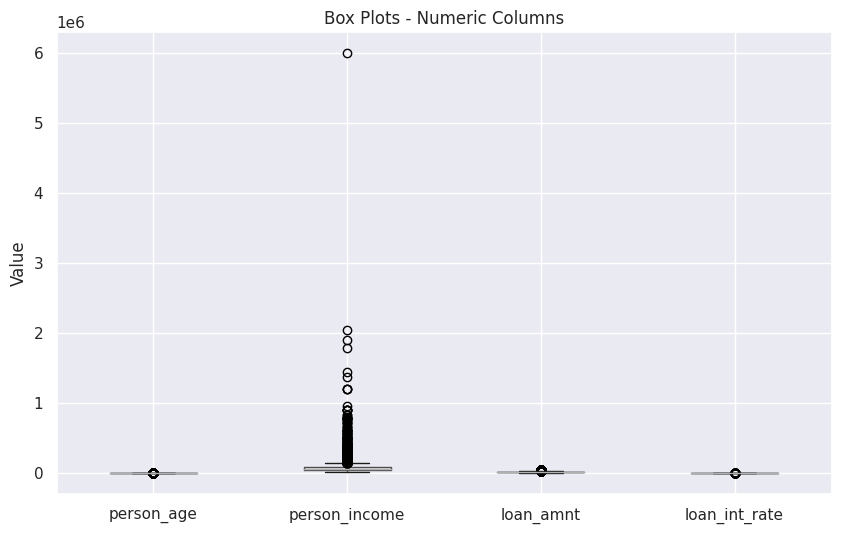

In [ ]:
# Select the numeric columns for outlier handling
numeric_cols = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate']

# Visualize the data before outlier handling (box plots)
df[numeric_cols].boxplot(figsize=(10, 6))
plt.title('Box Plots - Numeric Columns')
plt.ylabel('Value')
plt.show()

In [ ]:
# Outlier detection and handling using the IQR method
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove or replace outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

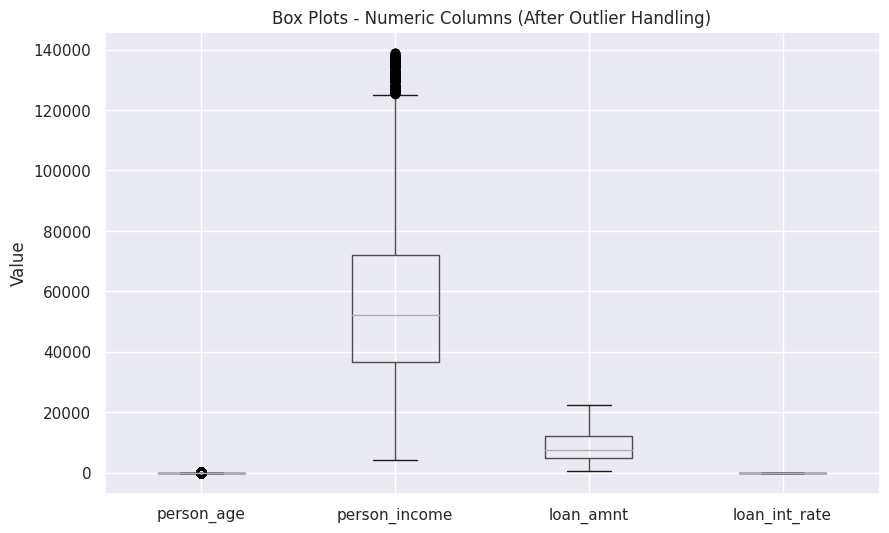

In [ ]:
# Visualize the data after outlier handling (box plots)
df[numeric_cols].boxplot(figsize=(10, 6))
plt.title('Box Plots - Numeric Columns (After Outlier Handling)')
plt.ylabel('Value')
plt.show()

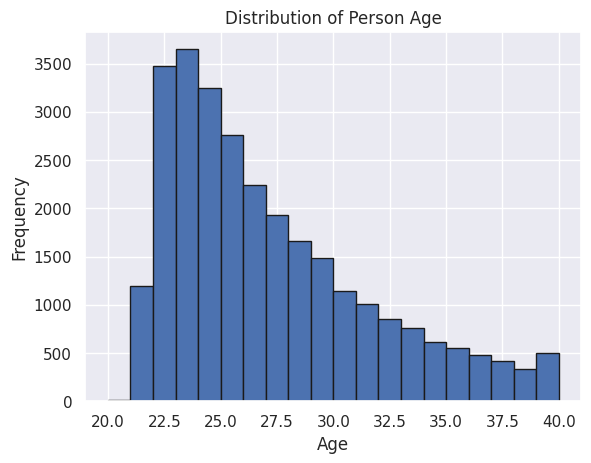

In [ ]:
#histogram for 'person_age'
plt.hist(df['person_age'], bins=20, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Person Age')
plt.show()

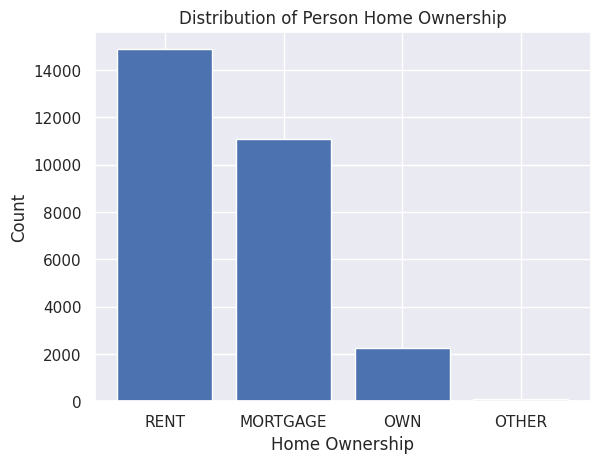

In [ ]:
# bar chart for 'person_home_ownership'
plt.bar(df['person_home_ownership'].value_counts().index, df['person_home_ownership'].value_counts().values)
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Person Home Ownership')
plt.show()

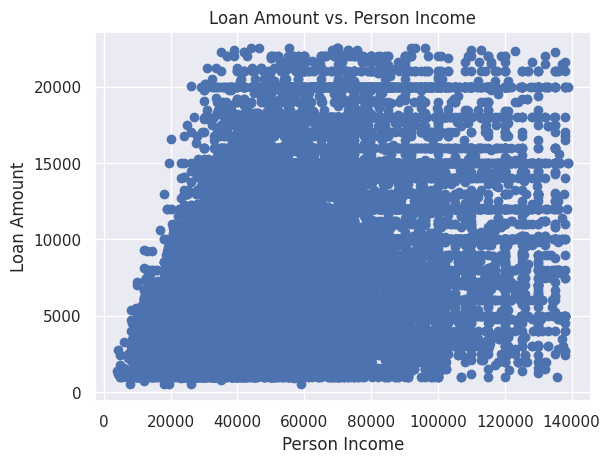

In [ ]:
# Scatter plot for 'loan_amnt' vs. 'person_income'
plt.scatter(df['person_income'], df['loan_amnt'])
plt.xlabel('Person Income')
plt.ylabel('Loan Amount')
plt.title('Loan Amount vs. Person Income')
plt.show()

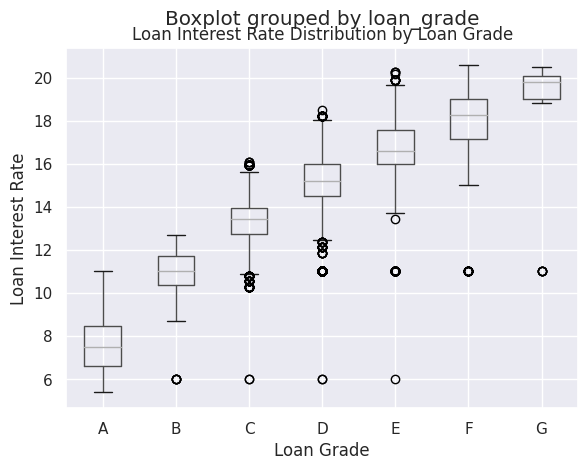

In [ ]:
# Box plot for 'loan_grade' and 'loan_int_rate'
df.boxplot(column='loan_int_rate', by='loan_grade')
plt.xlabel('Loan Grade')
plt.ylabel('Loan Interest Rate')
plt.title('Loan Interest Rate Distribution by Loan Grade')
plt.show()

Normalization


In [ ]:
# Select the numeric columns to normalize
numeric_cols = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Apply Min-Max scaling to the selected numeric columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print(df.head())

    person_age  person_income person_home_ownership  person_emp_length  \
1         0.05       0.040911                   OWN                5.0   
2         0.25       0.040911              MORTGAGE                1.0   
5         0.05       0.043134                   OWN                2.0   
9         0.05       0.043875                   OWN                6.0   
11        0.05       0.043875                   OWN                2.0   

        loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
1         EDUCATION          B   0.022727       0.376316            0   
2           MEDICAL          C   0.227273       0.490132            1   
5           VENTURE          A   0.090909       0.113158            1   
9           VENTURE          D   0.050000       0.613158            1   
11  HOMEIMPROVEMENT          A   0.181818       0.211184            1   

    loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
1                  0.10             

<Axes: xlabel='loan_int_rate', ylabel='Count'>

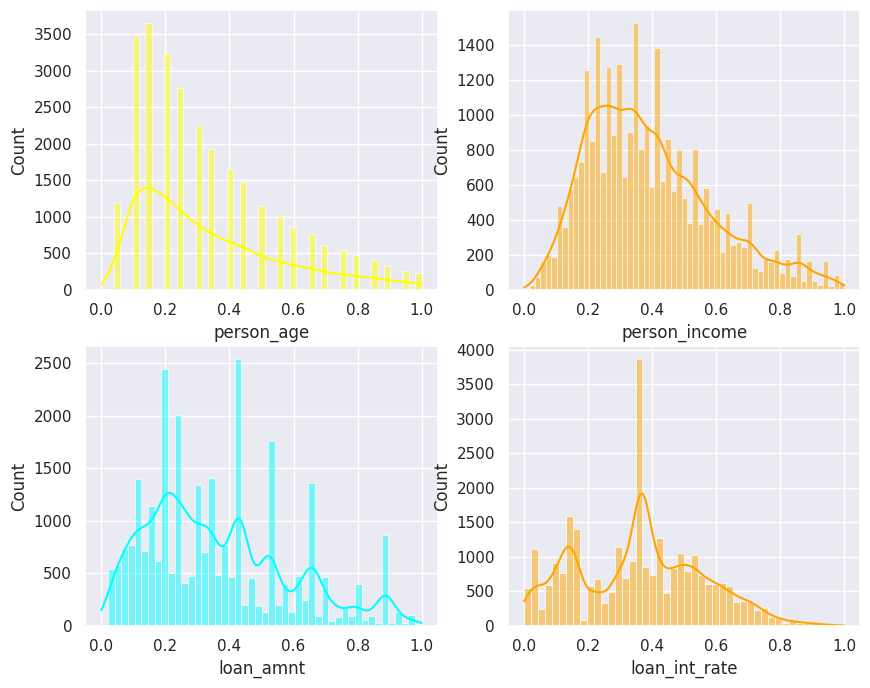

In [ ]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="person_age", kde=True, ax=axs[0,0], color='yellow')
sns.histplot(data=df, x="person_income", kde=True, ax=axs[0,1], color='orange')
sns.histplot(data=df, x="loan_amnt", kde=True, ax=axs[1,0], color='cyan')
sns.histplot(data=df, x="loan_int_rate", kde=True, ax=axs[1,1], color='orange')


**Feature Engineering**

**Training and Testing**

Label Encodeing

In [ ]:
# Select the categorical columns
categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

# Apply label encoding
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Print the encoded DataFrame
print(df.head())


    person_age  person_income  person_home_ownership  person_emp_length  \
1         0.05       0.040911                      2                5.0   
2         0.25       0.040911                      0                1.0   
5         0.05       0.043134                      2                2.0   
9         0.05       0.043875                      2                6.0   
11        0.05       0.043875                      2                2.0   

    loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_status  \
1             1           1   0.022727       0.376316            0   
2             3           2   0.227273       0.490132            1   
5             5           0   0.090909       0.113158            1   
9             5           3   0.050000       0.613158            1   
11            2           0   0.181818       0.211184            1   

    loan_percent_income  cb_person_default_on_file  cb_person_cred_hist_length  
1                  0.10                        

In [ ]:
# Select features and target variable
X = df[['person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file', 'cb_person_cred_hist_length']]
y = df['loan_status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Logisitc Regression**

In [ ]:
# Instantiate and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Print the metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8440480395619923
Precision: 0.7291139240506329
Recall: 0.46265060240963857
F1-score: 0.5660933660933661


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Neural Network (Multi-Layer Perceptron)**

In [ ]:
# Instantiate and fit the multi-layer perceptron classifier model
model = MLPClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Print the metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9072765807135288
Precision: 0.925531914893617
Recall: 0.6289156626506024
F1-score: 0.7489239598278336


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


**Support Vector Machines (SVM)**

In [ ]:
# Instantiate and fit the support vector machine classifier model
model = SVC()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Print the metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.830625220770046
Precision: 0.8235294117647058
Recall: 0.2923694779116466
F1-score: 0.43153526970954353


**Gradient Boosting Classifier (XGBoost)**

In [ ]:
# Instantiate and fit the XGBoost classifier model
model = XGBClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Print the metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.930943129636171
Precision: 0.9494736842105264
Recall: 0.7244979919678715
F1-score: 0.8218678815489749


**Random Forest Classifier**

In [ ]:
# Instantiate and fit the random forest classifier model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Print the metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.925821264570823
Precision: 0.9714285714285714
Recall: 0.6827309236947792
F1-score: 0.8018867924528301


**Feature Importance by Random Forest**

                       Feature  Importance
8          loan_percent_income    0.225824
1                person_income    0.158768
7                loan_int_rate    0.114709
5                   loan_grade    0.104397
2        person_home_ownership    0.094395
6                    loan_amnt    0.076397
4                  loan_intent    0.070359
3            person_emp_length    0.065212
0                   person_age    0.043454
10  cb_person_cred_hist_length    0.034658
9    cb_person_default_on_file    0.011828


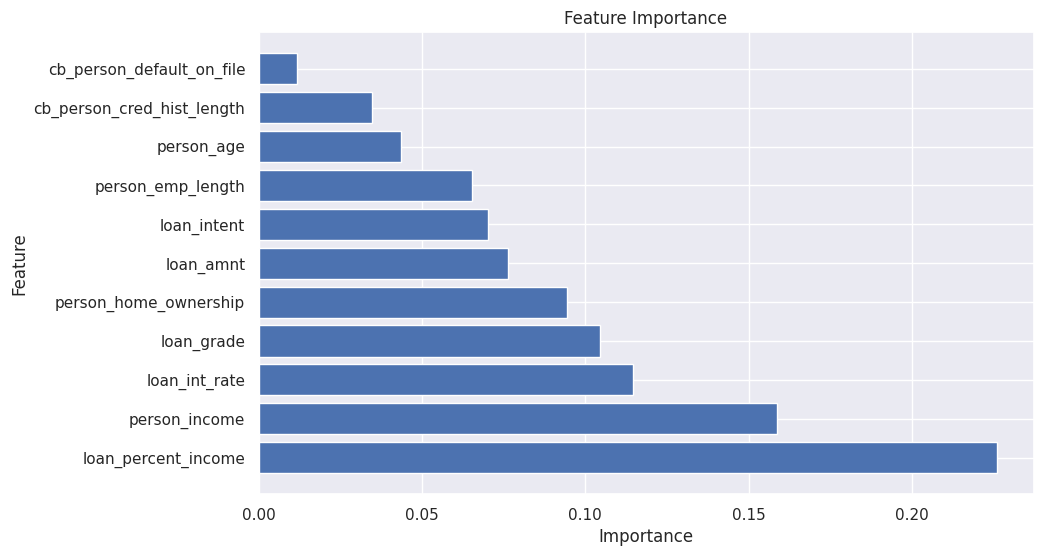

In [ ]:
# Get the feature importances
importances = model.feature_importances_

# Create a DataFrame with feature names and importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importances)

# Visualize the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

**Model Evaluation**

K-fold cross-validation

In [ ]:
# Perform k-fold cross-validation with prediction on test dataset
k = 5  # Number of folds
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Set return_train_score=True if you want to access training scores as well
cv_results = cross_validate(model, X_train, y_train, cv=k, scoring=scoring, return_train_score=False)

# Access the evaluation metrics for each fold
accuracy_scores = cv_results['test_accuracy']
precision_scores = cv_results['test_precision']
recall_scores = cv_results['test_recall']
f1_scores = cv_results['test_f1']

# Print the evaluation metrics for each fold
print("Cross-Validation Accuracy Scores:", accuracy_scores)
print("Cross-Validation Precision Scores:", precision_scores)
print("Cross-Validation Recall Scores:", recall_scores)
print("Cross-Validation F1-scores:", f1_scores)

# Calculate and print the average performance metrics across all folds
average_accuracy = accuracy_scores.mean()
average_precision = precision_scores.mean()
average_recall = recall_scores.mean()
average_f1 = f1_scores.mean()

print("Average Accuracy:", average_accuracy)
print("Average Precision:", average_precision)
print("Average Recall:", average_recall)
print("Average F1-score:", average_f1)

Cross-Validation Accuracy Scores: [0.92779863 0.92647384 0.92691543 0.93486421 0.92912343]
Cross-Validation Precision Scores: [0.95345557 0.98184569 0.95577746 0.97605634 0.96428571]
Cross-Validation Recall Scores: [0.69690722 0.66907216 0.69072165 0.71369722 0.69515963]
Cross-Validation F1-scores: [0.80524122 0.79583078 0.80191502 0.82450922 0.80789946]
Average Accuracy: 0.9290351070876574
Average Precision: 0.966284154532455
Average Recall: 0.6931115759075032
Average F1-score: 0.8070791393440387


Testing on Separate Dataset

In [ ]:
# Fit the model on the entire training dataset
model.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred = model.predict(X_test)

# Calculate the evaluation metrics on the test dataset
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the performance metrics on the test dataset
print("Test Accuracy:", accuracy)
print("Test Precision:", precision)
print("Test Recall:", recall)
print("Test F1-score:", f1)

Test Accuracy: 0.9252914164606146
Test Precision: 0.9691780821917808
Test Recall: 0.6819277108433734
Test F1-score: 0.8005657708628005
